# Customer Churn Prediction using Neural Network

This notebook addresses Task 2 of the assignment to predict customer churn using a neural network and handle class imbalance using SMOTE.

### 🔹 Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import RocCurveDisplay

### 🔹 Step 2: Load Dataset

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 🔹 Step 3: Preprocess the Data

In [3]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])  # Male: 1, Female: 0

df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

X = df.drop('Exited', axis=1)
y = df['Exited']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 🔹 Step 4: Train/Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.1, random_state=42, stratify=y)

### 🔹 Step 5: Handle Imbalance with SMOTE

In [5]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_smote))

Before SMOTE: [7167 1833]
After SMOTE: [7167 7167]


### 🔹 Step 6: Build Neural Network

In [6]:
model = Sequential()
model.add(Dense(64, activation='relu',  input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

d:\OneDrive - Higher Education Commission\Education\CyberGen\Assignment 4\deeplearning_env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

### 🔹 Step 7: Train the Model

In [7]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)

In [8]:
history = model.fit(X_train_smote, y_train_smote, epochs=500, batch_size=32, validation_split=0.1, callbacks=[early_stop, reduce_lr], verbose=1)

Epoch 1/500
404/404 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.6286 - loss: 0.6395 - val_accuracy: 0.7218 - val_loss: 0.5857 - learning_rate: 0.0010
Epoch 2/500
404/404 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7518 - loss: 0.5148 - val_accuracy: 0.7573 - val_loss: 0.5163 - learning_rate: 0.0010
Epoch 3/500
404/404 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7648 - loss: 0.4890 - val_accuracy: 0.7364 - val_loss: 0.5212 - learning_rate: 0.0010
Epoch 4/500
404/404 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7817 - loss: 0.4652 - val_accuracy: 0.7455 - val_loss: 0.5126 - learning_rate: 0.0010
Epoch 5/500
404/404 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.7807 - loss: 0.4637 - val_accuracy: 0.7315 - val_loss: 0.5267 - learning_rate: 0.0010
Epoch 6/500
404/404 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7838 - loss: 0.4613 - val_accuracy: 0.7190 - val_loss: 0.5245 - learning_rate: 0.0010
Epoch 7/500
404/404 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7913 - 

### 🔹 Step 8: Evaluate Model

In [9]:
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy: 0.804
F1 Score: 0.6095617529880478
ROC AUC Score: 0.8593580648339737


### 📈 Step 9: Training Curves

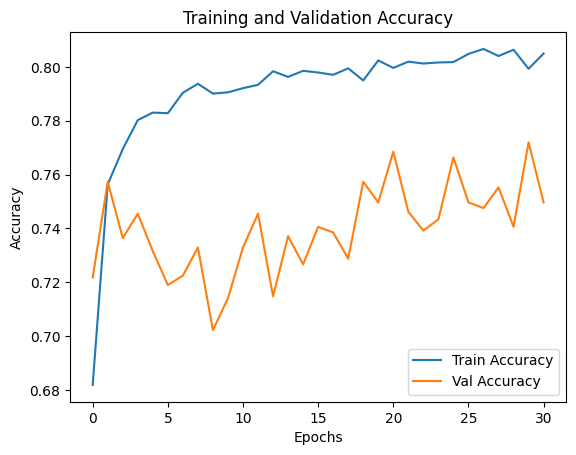

In [10]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

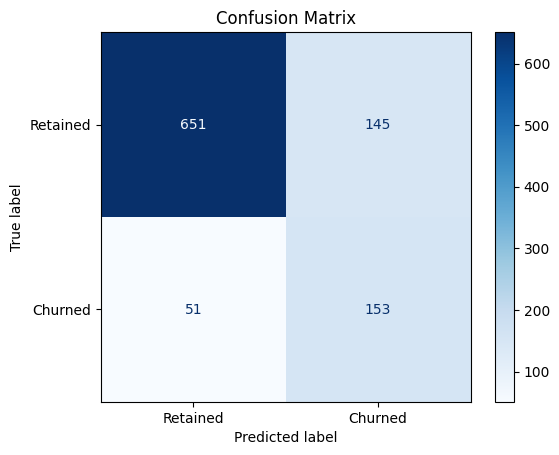

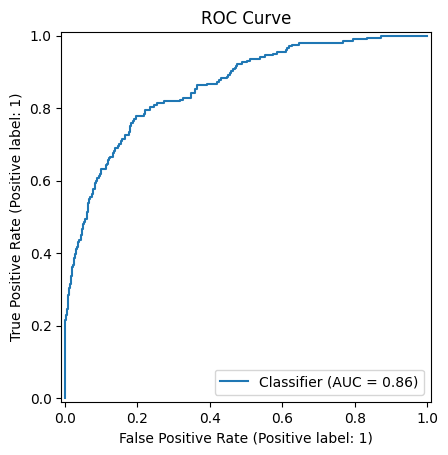

In [11]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Retained", "Churned"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plot ROC Curve
RocCurveDisplay.from_predictions(y_test, y_pred_prob)
plt.title("ROC Curve")
plt.show()

### Conclusion
- Class imbalance handled using **SMOTE**.
- Neural Network trained on balanced data.
- Evaluated using accuracy, F1 score, AUC, and confusion matrix.
- Model shows promising results for predicting customer churn.